# Traitement des textes

Analyser le contenu des textes n'est pas évident. Deux stratégies :
- une approche "à façon"
- recourir aux outils du traitement naturel du langage (package nltk)

## Approche par l'analyse des réseaux

Une librairie pour construire des réseaux : networkx

In [15]:
import networkx as nx
%matplotlib inline

Créer un réseau

In [2]:
G = nx.Graph()

Ajouter des noeuds et des liens

In [33]:
G.add_node("n1",label="Jean")
G.add_node("n2",label ="Jasmine")
G.add_node("n3",label = "Camille")
G.add_node("n4",label = "Jules")


G.add_edge("n1","n2")
G.add_edge("n1","n3")
G.add_edge("n1","n4")

In [24]:
G.node(data=True)

NodeDataView({'n2': {'label': 'Jasmine'}, 'n1': {'label': 'Jean'}, 'n3': {'label': 'Camille'}})

In [11]:
G.edges

EdgeView([('n2', 'n1')])

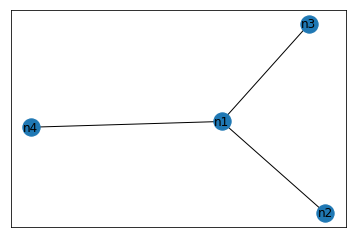

In [34]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)

Ecrire dans un fichier pour traiter avec Gephi par exemple

In [35]:
nx.write_graphml(G,"reseau.graphml")

Regarder la relation entre les mots

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
corpus = pd.read_excel("../Données/corpus.xlsx")

In [39]:
corpus[0:3]

,Date_reco,Date,Titre,Journal,Contenu,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed,Journal-reco
0,2018-05-23,"Science & Médecine, mercredi 23 mai 2018 246...",Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...,2679,43,2,2,0,Le Monde
1,2018-06-16,"Événement, samedi 16 juin 2018 1243 mots, p. 4",Principale «Réduire l'homéopathie à un effet ...,"Libération, no. 11524","Le regard, au-dessus des petites lunettes ce...",1341,26,0,12,0,Libération
2,2018-04-10,"Sciences et éthique, mardi 10 avril 2018 105...",Faut-il en finir avec l'homéopathie? Une trib...,"La Croix, no. 41073",Faut-il se débarrasser de l'homéopathie? Voi...,1183,23,0,0,0,La Croix


Construire le réseau des relations

In [53]:
G = nx.Graph()
G.add_node("nofakemed",weight=0)
G.add_node("allopath",weight=0)
G.add_node("alterna",weight=0)
for i,j in corpus.iterrows():
    G.add_node(i,weight=1)
    if j["freq-alterna"]>0:
        G.node["alterna"]["weight"]+=1
        G.add_edge(i,"alterna")
    if j["freq-allopath"]>0:
        G.node["allopath"]["weight"]+=1
        G.add_edge(i,"allopath")
    if j["freq-nofakemed"]>0:
        G.node["nofakemed"]["weight"]+=1
        G.add_edge(i,"nofakemed")

Faire une visualisation

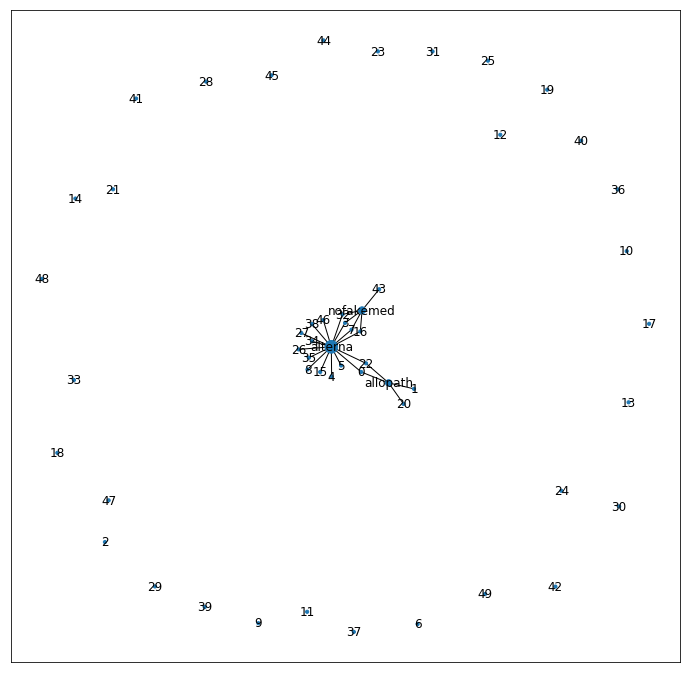

In [59]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw_networkx_nodes(G, pos,node_size=[10*i[1]["weight"] for i in G.node(data=True)])
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)

## Analyse avec le traitement automatique du langage

La librairie centrale est nltk : https://www.nltk.org/

Des étapes dans l'analyse d'un texte:
- découpage en mots
- suppression des mots usuels
- lematisation
- machine learning ...

### Préparer le texte

In [70]:
import nltk
from nltk import word_tokenize
#nltk.download('stopwords')

In [96]:
def pre(x):
    return x.replace("'"," ")

In [97]:
corpus["Contenu"] = corpus["Contenu"].apply(pre)

In [98]:
corpus["Contenu-prep-1"] = corpus["Contenu"].apply(word_tokenize)

Transformer chaque mots dans sa racine : stemmer

In [65]:
from nltk.stem.snowball import FrenchStemmer

In [75]:
def stemmer(x):
    st = FrenchStemmer()
    return [st.stem(i) for i in x]

In [99]:
corpus["Contenu-prep-2"] = corpus["Contenu-prep-1"].apply(stemmer)

In [100]:
corpus["Contenu-prep-2"].loc[0]

['(',
 'lyon',
 ';',
 'correspond',
 ')',
 ';',
 '-',
 'quand',
 'on',
 'lui',
 'parl',
 'de',
 'la',
 'derni',
 'attaqu',
 'en',
 'regl',
 'contr',
 'l',
 'homéopath',
 ',',
 'christian',
 'boiron',
 'soupir',
 '.',
 'le',
 'patron',
 'du',
 'lead',
 'mondial',
 'du',
 'médic',
 'homéopath',
 ',',
 'rencontr',
 'à',
 'messimy',
 ',',
 'pres',
 'de',
 'lyon',
 ',',
 'un',
 'de',
 'quatr',
 'sit',
 'de',
 'product',
 'du',
 'group',
 'en',
 'franc',
 ',',
 'répond',
 ',',
 'avec',
 'un',
 'brin',
 'de',
 'condescend',
 ':',
 '«',
 'cel',
 'n',
 'intéress',
 'pas',
 'grand',
 'mond',
 '.',
 'peut-êtr',
 'un',
 'microcosm',
 'étroit',
 '.',
 'cel',
 'ne',
 'chang',
 'pas',
 'un',
 'gramm',
 'de',
 'granul',
 'que',
 'nous',
 'pouvon',
 'vendr',
 'ou',
 'ne',
 'pas',
 'vendr',
 '.',
 '»',
 'le',
 'descend',
 'du',
 'laboratoir',
 'familial',
 'lyon',
 'se',
 'livr',
 'rar',
 '.',
 'fac',
 'à',
 'la',
 'virulent',
 'de',
 'la',
 'derni',
 'polem',
 ',',
 'il',
 'conf',
 'au',
 'mond',
 'son

Supprimer les stopwords

In [80]:
from nltk.corpus import stopwords
sw = set(stopwords.words('french'))

In [104]:
sw = list(sw)+[".",",",":",'«','(',')',";","-",'»']

In [105]:
def rm_sw(x):
    return [i for i in x if not i in sw]

In [106]:
corpus["Contenu-prep-3"] = corpus["Contenu-prep-2"].apply(rm_sw)

In [109]:
pd.Series(corpus["Contenu-prep-3"].loc[0]).value_counts()

homéopath       43
médic           29
médecin         24
dan             18
plus            17
a               15
boiron          14
rembours        13
être            11
sant            11
%               10
fait             8
peut             8
franc            8
cel              7
indiqu           7
comm             7
auss             7
cet              7
dérembours       7
dit              7
si               7
autr             7
question         6
effet            6
depuis           6
euros            6
bien             6
christian        6
médical          5
                ..
octobr           1
défianc          1
insiste-t-on     1
qualit           1
dépos            1
0,29             1
arriv            1
miment           1
chemin           1
appos            1
fair             1
gros             1
fac              1
mention          1
mai              1
favor            1
38,7             1
dispos           1
conduir          1
openhealth       1
prononc          1
phosphoricum

Continuer le traitement : enlever les mots les plus courts ...